In [1]:
'''
Abhigyan Basak
Reg No - 210968124
Batch A2
'''

'\nAbhigyan Basak\nReg No - 210968124\nBatch A2\n'

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf
import keras
from tensorflow.keras import models, layers
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#reading the dataset
df = pd.read_csv('bodyfat.csv')
df.head()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,101.9,63.2,42.2,24.0,32.2,27.7,17.7


In [4]:
#output variable : BodyFat -> regression problem

In [5]:
#checking the number of attributes and instances in the dataset
df.shape

(252, 15)

In [6]:
#checking for null values
df.isnull().sum()

Density    0
BodyFat    0
Age        0
Weight     0
Height     0
Neck       0
Chest      0
Abdomen    0
Hip        0
Thigh      0
Knee       0
Ankle      0
Biceps     0
Forearm    0
Wrist      0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 15 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Density  252 non-null    float64
 1   BodyFat  252 non-null    float64
 2   Age      252 non-null    int64  
 3   Weight   252 non-null    float64
 4   Height   252 non-null    float64
 5   Neck     252 non-null    float64
 6   Chest    252 non-null    float64
 7   Abdomen  252 non-null    float64
 8   Hip      252 non-null    float64
 9   Thigh    252 non-null    float64
 10  Knee     252 non-null    float64
 11  Ankle    252 non-null    float64
 12  Biceps   252 non-null    float64
 13  Forearm  252 non-null    float64
 14  Wrist    252 non-null    float64
dtypes: float64(14), int64(1)
memory usage: 29.7 KB


In [8]:
#5-number summary
df.describe()

,Density,BodyFat,Age,Weight,Height,Neck,Chest,Abdomen,Hip,Thigh,Knee,Ankle,Biceps,Forearm,Wrist
count,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000,252.000000
mean,1.055574,19.150794,44.884921,178.924405,70.148810,37.992063,100.824206,92.555952,99.904762,59.405952,38.590476,23.102381,32.273413,28.663889,18.229762
std,0.019031,8.368740,12.602040,29.389160,3.662856,2.430913,8.430476,10.783077,7.164058,5.249952,2.411805,1.694893,3.021274,2.020691,0.933585
min,0.995000,0.000000,22.000000,118.500000,29.500000,31.100000,79.300000,69.400000,85.000000,47.200000,33.000000,19.100000,24.800000,21.000000,15.800000
25%,1.041400,12.475000,35.750000,159.000000,68.250000,36.400000,94.350000,84.575000,95.500000,56.000000,36.975000,22.000000,30.200000,27.300000,17.600000
50%,1.054900,19.200000,43.000000,176.500000,70.000000,38.000000,99.650000,90.950000,99.300000,59.000000,38.500000,22.800000,32.050000,28.700000,18.300000
75%,1.070400,25.300000,54.000000,197.000000,72.250000,39.425000,105.375000,99.325000,103.525000,62.350000,39.925000,24.000000,34.325000,30.000000,18.800000
max,1.108900,47.500000,81.000000,363.150000,77.750000,51.200000,136.200000,148.100000,147.700000,87.300000,49.100000,33.900000,45.000000,34.900000,21.400000


<Axes: >

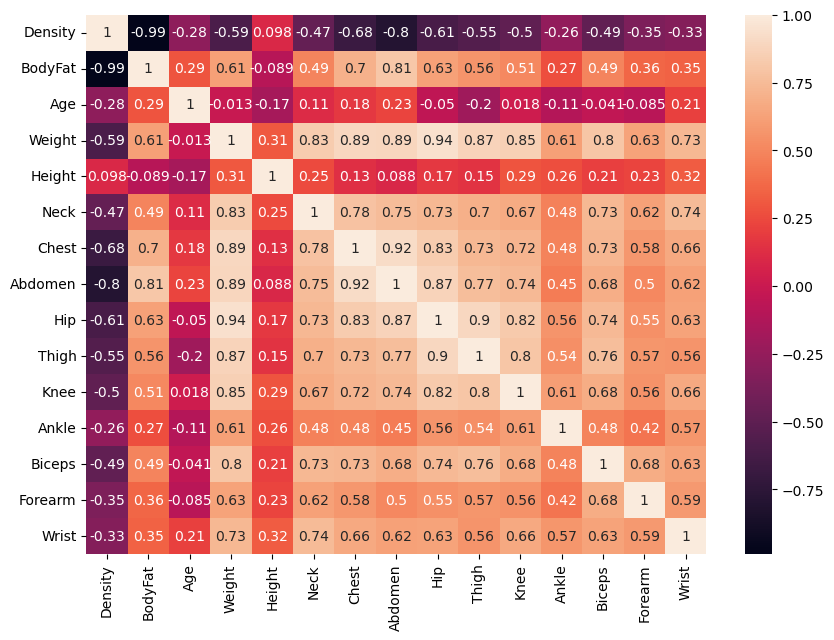

In [9]:
plt.figure(figsize = (10, 7))
sns.heatmap(df.corr(), annot = True)

In [10]:
#Since Height seems to have no correlation with BodyFat, we'll drop that attribute

In [11]:
X = df.drop(['BodyFat', 'Height'], axis = 1)
y = df['BodyFat']

In [12]:
#normalizing the data
from sklearn.preprocessing import MinMaxScaler
# X = (X - X.mean()) / (X.max() - X.min())
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

In [13]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [14]:
#since its a regression problem, the output layer has linear activation function
model = models.Sequential([
    layers.Input(shape = (X.shape[1])),
    layers.Dense(128, activation = 'relu'),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1, activation = 'linear')
])

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 12,161
Trainable params: 12,161
Non-trainable params: 0
_________________________________________________________________


In [16]:
#mse as loss function as its a regression problem and RMSE as metric
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.1), loss = 'mean_squared_error', metrics = ['RootMeanSquaredError'])

In [17]:
history = model.fit(x_train, y_train, epochs = 100, validation_split = 0.1)

Epoch 1/100


2023-08-09 21:08:21.663964: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


6/6 [==============================] - 1s 54ms/step - loss: 5998.9106 - root_mean_squared_error: 77.4526 - val_loss: 64.6574 - val_root_mean_squared_error: 8.0410
Epoch 2/100
6/6 [==============================] - 0s 15ms/step - loss: 16803.2910 - root_mean_squared_error: 129.6275 - val_loss: 7323.9971 - val_root_mean_squared_error: 85.5804
Epoch 3/100
6/6 [==============================] - 0s 16ms/step - loss: 46938.0938 - root_mean_squared_error: 216.6520 - val_loss: 89.6108 - val_root_mean_squared_error: 9.4663
Epoch 4/100
6/6 [==============================] - 0s 18ms/step - loss: 51202.8828 - root_mean_squared_error: 226.2805 - val_loss: 20095.5879 - val_root_mean_squared_error: 141.7589
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 25904.9590 - root_mean_squared_error: 160.9502 - val_loss: 12377.7627 - val_root_mean_squared_error: 111.2554
Epoch 6/100
6/6 [==============================] - 0s 15ms/step - loss: 17815.8086 - root_mean_squared_error: 133.47

Epoch 47/100
6/6 [==============================] - 0s 15ms/step - loss: 1799.3250 - root_mean_squared_error: 42.4184 - val_loss: 490.4666 - val_root_mean_squared_error: 22.1465
Epoch 48/100
6/6 [==============================] - 0s 17ms/step - loss: 1826.3235 - root_mean_squared_error: 42.7355 - val_loss: 894.6341 - val_root_mean_squared_error: 29.9104
Epoch 49/100
6/6 [==============================] - 0s 14ms/step - loss: 2524.5657 - root_mean_squared_error: 50.2451 - val_loss: 1708.9010 - val_root_mean_squared_error: 41.3389
Epoch 50/100
6/6 [==============================] - 0s 12ms/step - loss: 2299.2397 - root_mean_squared_error: 47.9504 - val_loss: 2718.6567 - val_root_mean_squared_error: 52.1407
Epoch 51/100
6/6 [==============================] - 0s 12ms/step - loss: 2152.7507 - root_mean_squared_error: 46.3977 - val_loss: 1573.6008 - val_root_mean_squared_error: 39.6686
Epoch 52/100
6/6 [==============================] - 0s 12ms/step - loss: 2305.0386 - root_mean_squared_erro

6/6 [==============================] - 0s 12ms/step - loss: 76370.5781 - root_mean_squared_error: 276.3523 - val_loss: 12444.5264 - val_root_mean_squared_error: 111.5550
Epoch 94/100
6/6 [==============================] - 0s 12ms/step - loss: 146971.1406 - root_mean_squared_error: 383.3682 - val_loss: 164664.6250 - val_root_mean_squared_error: 405.7889
Epoch 95/100
6/6 [==============================] - 0s 12ms/step - loss: 64504.9883 - root_mean_squared_error: 253.9783 - val_loss: 52734.6367 - val_root_mean_squared_error: 229.6402
Epoch 96/100
6/6 [==============================] - 0s 12ms/step - loss: 20998.9883 - root_mean_squared_error: 144.9103 - val_loss: 16345.9600 - val_root_mean_squared_error: 127.8513
Epoch 97/100
6/6 [==============================] - 0s 12ms/step - loss: 7131.6729 - root_mean_squared_error: 84.4492 - val_loss: 2921.7183 - val_root_mean_squared_error: 54.0529
Epoch 98/100
6/6 [==============================] - 0s 12ms/step - loss: 2452.3962 - root_mean_squar

In [18]:
loss, rmse = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test RMSE:", rmse)

2/2 [==============================] - 0s 30ms/step - loss: 98.0578 - root_mean_squared_error: 9.9024
Test Loss: 98.05780792236328
Test RMSE: 9.902414321899414


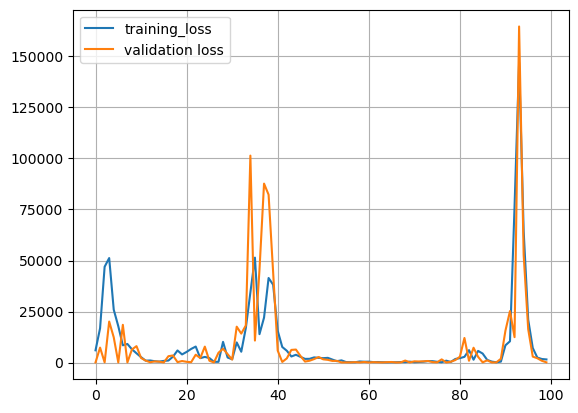

In [19]:
plt.plot(history.history['loss'], label = 'training_loss')
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.legend()
plt.grid(True)

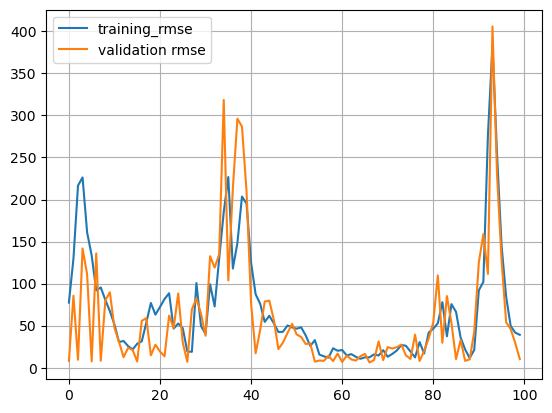

In [20]:
plt.plot(history.history['root_mean_squared_error'], label = 'training_rmse')
plt.plot(history.history['val_root_mean_squared_error'], label = 'validation rmse')
plt.legend()
plt.grid(True)

In [21]:
'''
The model doesn't seem to have overfit
As we can see from the graphs towards the end, the validation loss seems to be comparable to the training loss
Ideal stopping point seems to be around 60-70 epochs as the loss seems the most stable there and the validation loss
is not fluctuating a lot either. 
'''

"\nThe model doesn't seem to have overfit\nAs we can see from the graphs towards the end, the validation loss seems to be comparable to the training loss\nIdeal stopping point seems to be around 60-70 epochs as the loss seems the most stable there and the validation loss\nis not fluctuating a lot either. \n"